<a href="https://colab.research.google.com/github/sgsoul/mwtda/blob/main/MWTDA_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Лабораторная работа №2**

 Лоскутова Ирина 
 
 группа R32423

---

Вариант: 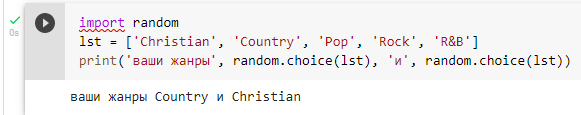

**1.0**

---



Загружаем датасет:



In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/dataset.csv")
data.head()

Mounted at /content/drive


,genre,lyrics,SongInfo
0,Christian,"Who am I, that the Lord of all the earth Woul...",CASTING CROWNS - WHO AM I LYRICS
1,Christian,Glory Revealed By His Wounds He was pierced ...,GLORY REVEALED - BY HIS WOUNDS LYRICS
2,Christian,Lord of heaven and earth Lord of all creation...,CAEDMON'S CALL - GOD OF WONDERS LYRICS
3,Christian,I can only imagine what it will be like When ...,MERCYME - I CAN ONLY IMAGINE LYRICS
4,Christian,I am not skilled to understand What God has w...,AARON SHUST - MY SAVIOR MY GOD LYRICS


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genre     558 non-null    object
 1   lyrics    558 non-null    object
 2   SongInfo  558 non-null    object
dtypes: object(3)
memory usage: 13.2+ KB


Оставляем только нужные колонки и строки:

In [ ]:
columns = data[['genre', 'lyrics']]

In [ ]:
columns

,genre,lyrics
0,Christian,"Who am I, that the Lord of all the earth Woul..."
1,Christian,Glory Revealed By His Wounds He was pierced ...
2,Christian,Lord of heaven and earth Lord of all creation...
3,Christian,I can only imagine what it will be like When ...
4,Christian,I am not skilled to understand What God has w...
...,...,...
553,R&B,"Ha I dont care ha, about your past I just wan..."
554,R&B,Hoverin by my suitcase Tryin to find a warm ...
555,R&B,I dont know why I love you like I do After a...
556,R&B,"C. C. Rider Elvis Presley Well now see., C. ..."


In [ ]:
columns = columns[(columns.genre == 'Christian') | (columns.genre == 'Country')]

In [ ]:
columns

,genre,lyrics
0,Christian,"Who am I, that the Lord of all the earth Woul..."
1,Christian,Glory Revealed By His Wounds He was pierced ...
2,Christian,Lord of heaven and earth Lord of all creation...
3,Christian,I can only imagine what it will be like When ...
4,Christian,I am not skilled to understand What God has w...
...,...,...
176,Country,One evening as the sun went down And the jung...
177,Country,I see the questions in your eyes I know whats...
178,Country,Big orange ball sinkin in the water Toes in t...
179,Country,"Dolly Parton Greatest Hits Jolene Jolene, jol..."


Создаём функцию preprocessing для предварительной обработки данных:

In [ ]:
def preprocessing(columns):
  #приведение к нижнему регистру
  lowered = columns['lyrics'].str.lower()
  columns['lowered'] = lowered

  #токенизация
  import nltk
  nltk.download('omw-1.4')
  from nltk.tokenize import word_tokenize
  nltk.download('punkt')
  tokened = columns.apply(lambda row: nltk.word_tokenize(row['lowered']), axis=1)
  columns['tokened'] = tokened

  #удаление стоп-слов
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  noise = stopwords.words('english')
  withoutstop = columns['tokened'].apply(lambda x: [item for item in x if item not in stopwords.words('english')])
  without_stop = []
  for a in withoutstop:    
      without_stop.append(", ".join(a))
  columns['without_stop'] = without_stop

  #лемматизация  
  from nltk.stem import WordNetLemmatizer 
  nltk.download('wordnet')
  lemmatizer = WordNetLemmatizer()
  lemmatized = columns['without_stop'].apply(lambda x: [lemmatizer.lemmatize(x)])
  lemma = []
  for a in lemmatized:    
      lemma.append(", ".join(a))
  columns['lemmatized'] = lemma

  return columns

Обрабатываем данные с помощью этой функции:

In [ ]:
columns = preprocessing(columns)
columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
[nltk_data] Downloading package stopwords to /root/nltk_data...

,genre,lyrics,lowered,tokened,without_stop,lemmatized
0,Christian,"Who am I, that the Lord of all the earth Woul...","who am i, that the lord of all the earth woul...","[who, am, i, ,, that, the, lord, of, all, the,...",",, lord, earth, would, care, know, name, would...",",, lord, earth, would, care, know, name, would..."
1,Christian,Glory Revealed By His Wounds He was pierced ...,glory revealed by his wounds he was pierced ...,"[glory, revealed, by, his, wounds, he, was, pi...","glory, revealed, wounds, pierced, transgressio...","glory, revealed, wounds, pierced, transgressio..."
2,Christian,Lord of heaven and earth Lord of all creation...,lord of heaven and earth lord of all creation...,"[lord, of, heaven, and, earth, lord, of, all, ...","lord, heaven, earth, lord, creation, lord, hea...","lord, heaven, earth, lord, creation, lord, hea..."
3,Christian,I can only imagine what it will be like When ...,i can only imagine what it will be like when ...,"[i, can, only, imagine, what, it, will, be, li...","imagine, like, walk, side, imagine, eyes, see,...","imagine, like, walk, side, imagine, eyes, see,..."
4,Christian,I am not skilled to understand What God has w...,i am not skilled to understand what god has w...,"[i, am, not, skilled, to, understand, what, go...","skilled, understand, god, willed, ,, god, plan...","skilled, understand, god, willed, ,, god, plan..."
...,...,...,...,...,...,...
176,Country,One evening as the sun went down And the jung...,one evening as the sun went down and the jung...,"[one, evening, as, the, sun, went, down, and, ...","one, evening, sun, went, jungle, fire, burning...","one, evening, sun, went, jungle, fire, burning..."
177,Country,I see the questions in your eyes I know whats...,i see the questions in your eyes i know whats...,"[i, see, the, questions, in, your, eyes, i, kn...","see, questions, eyes, know, whats, weighing, m...","see, questions, eyes, know, whats, weighing, m..."
178,Country,Big orange ball sinkin in the water Toes in t...,big orange ball sinkin in the water toes in t...,"[big, orange, ball, sinkin, in, the, water, to...","big, orange, ball, sinkin, water, toes, sand, ...","big, orange, ball, sinkin, water, toes, sand, ..."
179,Country,"Dolly Parton Greatest Hits Jolene Jolene, jol...","dolly parton greatest hits jolene jolene, jol...","[dolly, parton, greatest, hits, jolene, jolene...","dolly, parton, greatest, hits, jolene, jolene,...","dolly, parton, greatest, hits, jolene, jolene,..."


Разбиваем данные для тренировки и тестирования:

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(columns.lemmatized, columns.genre, train_size = 0.7)
columns.genre.value_counts()

Christian    94
Country      87
Name: genre, dtype: int64

Произведём векторизацию:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 3))
vectorized_x_train = vectorizer.fit_transform(x_train)

Обучаем и тестируем модель:

In [ ]:
#обучаем Байесовский классификатор
from sklearn.naive_bayes import MultinomialNB 
clf = MultinomialNB()
clf.fit(vectorized_x_train, y_train)

vectorized_x_test = vectorizer.transform(x_test)

#предсказываем и получаем оценку точности
from sklearn.metrics import * 
pred = clf.predict(vectorized_x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

   Christian       0.96      0.93      0.94        27
     Country       0.93      0.96      0.95        28

    accuracy                           0.95        55
   macro avg       0.95      0.95      0.95        55
weighted avg       0.95      0.95      0.95        55



**2.0**

---



Загружаем самостоятельно найденные данные:

In [ ]:
song_1_lyrics = ''' If she get a shot of whiskey, she know how to throw it back
She turn up for Elvis Presley, told the DJ, "Throw it back"
She look better every Thursday, she don't have to throw it back
Shawty got me catching feelings, I just hope she throw it back

Throw it, throw it back
Drop it low, you can blame it on the Jack, ayy
Slow it down, girl, I'm tryna make it last, ayy
If you sexy and you know it, make it clap
Throw it, throw it, throw it back

I threw it on back
Nothing says summer like the way she make me feel (feel)
A tall glass of natural woman
I can tell that she keep it real (she keep it real, yeah)
A green light
She'll give it to you, gotta get it 'fore it turn red (ooh-hoo)
Hotter than a flame
I barely know her name, but I'm damn sure willing to bet (yeah)

If she get a shot of whiskey, she know how to throw it back
She turn up for Elvis Presley, told the DJ, "Throw it back"
She look better every Thursday, she don't have to throw it back
Shawty got me catching feelings, I just hope she throw it back

Throw it, throw it back
Drop it low, you can blame it on the Jack, ayy
Slow it down, girl, I'm tryna make it last, ayy
If you sexy and you know it, make it clap
Throw it, throw it

Better thank Jesus, making them peaches
Georgia Bulldog got me SEC-sick
She on that wave and I'm deep in
Tryna buy another round (throw it back)
Let me see the levee-breakin' Chevy, super heavy-duty
Toot-toot for the dude-dude, babe
Bubble-bubble, you been eating your McDoubles
And it's trouble for me

If she get a shot of whiskey, she know how to throw it back
She turn up for Elvis Presley, told the DJ, "Throw it back"
She look better every Thursday, she don't have to throw it back
Shawty got me catching feelings, I just hope she throw it back

Throw it, throw it back
Drop it low, you can blame it on the Jack, ayy
Slow it down, girl, I'm tryna make it last, ayy
If you sexy and you know it, make it clap
Throw it, throw it, throw it back (do it to 'em, Keith)

If she get a shot of whiskey, she know how to throw it back
She turn up for Elvis Presley, told the DJ, "Throw it back" (throw it back)
She look better every Thursday, she don't have to throw it back
Shawty got me catching feelings, I just hope she throw it back (hmm, won't you)

Throw it, throw it back
Drop it low, you can blame it on the Jack, ayy
Slow it down, girl, I'm tryna make it last, ayy
If you sexy and you know it, make it clap
Throw it, throw it

Throw it back
Drop it low, you can blame it on the Jack (on the Jack)
Slow it down, girl, I'm tryna make it last, ayy
If you sexy and you know it, make it clap
Throw it, throw it, throw it back
 '''

song_2_lyrics = ''' I hate feeling like this
I'm so tired of trying to fight this
I'm asleep and all I dream of
Is waking to you

Tell me that you will listen
Your touch is what I'm missing
And the more I hide, I realize
I'm slowly losing you

Comatose
I'll never wake up without an overdose of you

I don't wanna live, I don't wanna breathe
'Less I feel you next to me
You take the pain I feel
Waking up to you never felt so real

I don't wanna sleep, I don't wanna dream
'Cause my dreams don't comfort me
The way you make me feel
Waking up to you never felt so real

I hate living without you
Dead wrong to ever doubt you
But my demons lay in waiting
Tempting me away

Oh, how I adore you
Oh, how I thirst for you
Oh, how I need you

Comatose
I'll never wake up without an overdose of you

I don't wanna live, I don't wanna breathe
'Less I feel you next to me
You take the pain I feel
Waking up to you never felt so real

I don't wanna sleep, I don't wanna dream
'Cause my dreams don't comfort me
The way you make me feel
Waking up to you never felt so real

Breathing life
Waking up
My eyes open up

Comatose
I'll never wake up without an overdose of you

I don't wanna live, I don't wanna breathe
'Less I feel you next to me
You take the pain I feel
Waking up to you never felt so real

I don't wanna sleep, I don't wanna dream
'Cause my dreams don't comfort me
The way you make me feel
Waking up to you never felt so real

Oh, how I adore you
Waking up to you never felt so real
Oh, how I thirst for you
Waking up to you never felt so real
Oh, how I adore you
The way you make me feel
Waking up to you never felt so real
 '''
song_1_genre = "Country"
song_2_genre = "Christian"

Формируем новый датасет и обрабытываем его:

In [ ]:
columns2 = pd.DataFrame(data = {"genre":[song_1_genre,song_2_genre],"lyrics":[song_1_lyrics,song_2_lyrics]})
columns2 = preprocessing(columns2)
columns2

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,genre,lyrics,lowered,tokened,without_stop,lemmatized
0,Country,"If she get a shot of whiskey, she know how to...","if she get a shot of whiskey, she know how to...","[if, she, get, a, shot, of, whiskey, ,, she, k...","get, shot, whiskey, ,, know, throw, back, turn...","get, shot, whiskey, ,, know, throw, back, turn..."
1,Christian,I hate feeling like this\nI'm so tired of try...,i hate feeling like this\ni'm so tired of try...,"[i, hate, feeling, like, this, i, 'm, so, tire...","hate, feeling, like, 'm, tired, trying, fight,...","hate, feeling, like, 'm, tired, trying, fight,..."


Тестируем модель:

In [ ]:
pred2 = clf.predict(vectorizer.transform(columns2['lemmatized']))
print(classification_report(columns2['genre'], pred2))

              precision    recall  f1-score   support

   Christian       1.00      1.00      1.00         1
     Country       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



**3.0**

---



Загружаем и обрабатываем данные: 

In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/dataset-lyrics-musics-mini.csv")
columns = data2[['cantorNome', 'letra']]
columns = columns[(columns.cantorNome == "david-bowie")|(columns.cantorNome == "paul-mccartney")]
columns['lyrics'] = columns['letra']
columns = preprocessing(columns)
columns

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,cantorNome,letra,lyrics,lowered,tokened,without_stop,lemmatized
0,david-bowie,"I, I will be king. And you, you will be queen....","I, I will be king. And you, you will be queen....","i, i will be king. and you, you will be queen....","[i, ,, i, will, be, king, ., and, you, ,, you,...",",, king, ., ,, queen, ., though, nothing, driv...",",, king, ., ,, queen, ., though, nothing, driv..."
1,david-bowie,"Didn't know what time it was,. The lights were...","Didn't know what time it was,. The lights were...","didn't know what time it was,. the lights were...","[did, n't, know, what, time, it, was, ,, ., th...","n't, know, time, ,, ., lights, low, ., leaned,...","n't, know, time, ,, ., lights, low, ., leaned,..."
2,david-bowie,Ground control to Major Tom. Ground control to...,Ground control to Major Tom. Ground control to...,ground control to major tom. ground control to...,"[ground, control, to, major, tom, ., ground, c...","ground, control, major, tom, ., ground, contro...","ground, control, major, tom, ., ground, contro..."
3,david-bowie,It's a god-awful small affair. To the girl wit...,It's a god-awful small affair. To the girl wit...,it's a god-awful small affair. to the girl wit...,"[it, 's, a, god-awful, small, affair, ., to, t...","'s, god-awful, small, affair, ., girl, mousy, ...","'s, god-awful, small, affair, ., girl, mousy, ..."
4,david-bowie,I know when to go out. And when to stay in. Ge...,I know when to go out. And when to stay in. Ge...,i know when to go out. and when to stay in. ge...,"[i, know, when, to, go, out, ., and, when, to,...","know, go, ., stay, ., get, things, done, ., ca...","know, go, ., stay, ., get, things, done, ., ca..."
...,...,...,...,...,...,...,...
942,paul-mccartney,He's just a young boy looking for a way to fin...,He's just a young boy looking for a way to fin...,he's just a young boy looking for a way to fin...,"[he, 's, just, a, young, boy, looking, for, a,...","'s, young, boy, looking, way, find, love, ., n...","'s, young, boy, looking, way, find, love, ., n..."
943,paul-mccartney,How can I hope to reach your love. Help me to ...,How can I hope to reach your love. Help me to ...,how can i hope to reach your love. help me to ...,"[how, can, i, hope, to, reach, your, love, ., ...","hope, reach, love, ., help, discover, ., 're, ...","hope, reach, love, ., help, discover, ., 're, ..."
944,paul-mccartney,I like it. Please don't take my heart away. It...,I like it. Please don't take my heart away. It...,i like it. please don't take my heart away. it...,"[i, like, it, ., please, do, n't, take, my, he...","like, ., please, n't, take, heart, away, ., 's...","like, ., please, n't, take, heart, away, ., 's..."
945,paul-mccartney,Yvonne is the one I´ve been counting on. She s...,Yvonne is the one I´ve been counting on. She s...,yvonne is the one i´ve been counting on. she s...,"[yvonne, is, the, one, i´ve, been, counting, o...","yvonne, one, i´ve, counting, ., said, long, yo...","yvonne, one, i´ve, counting, ., said, long, yo..."


Разбиваем данные для тренировки и тестирования. Векторизуем:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(columns.lemmatized, columns.cantorNome, train_size = 0.7)


#векторизация
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 3))
vectorized_x_train = vectorizer.fit_transform(x_train)

Тестируем модель:

In [ ]:
#обучаем Баесовский классификатор
from sklearn.naive_bayes import MultinomialNB 
clf = MultinomialNB()
clf.fit(vectorized_x_train, y_train)

#предсказываем и получаем оценку точности
from sklearn.metrics import * 
pred = clf.predict(vectorizer.transform(x_test))
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

   david-bowie       0.81      0.67      0.74       156
paul-mccartney       0.67      0.81      0.74       129

      accuracy                           0.74       285
     macro avg       0.74      0.74      0.74       285
  weighted avg       0.75      0.74      0.74       285

